In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC

df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

print(df.shape)

(19999, 785)


In [2]:
X = df.drop('6', axis=1)  # Features
X = X/255.0
X = scale(X)
y = df['6']  # Labels

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
print("X-Train Shape:", X_train.shape)
print("X-Test Shape:", X_test.shape)

X-Train Shape: (7999, 784)
X-Test Shape: (12000, 784)


In [4]:
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100]:
    svm = LinearSVC(dual=False, C=c, penalty='l1')
    svm.fit(X_train, y_train)
    coef = svm.coef_

    p_tr = svm.predict(X_train)
    a_tr = accuracy_score(y_train, p_tr)

    pred = svm.predict(X_test)
    a = accuracy_score(y_test, pred)

    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<ipython-input-5-06f9f745a920>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  plt.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")


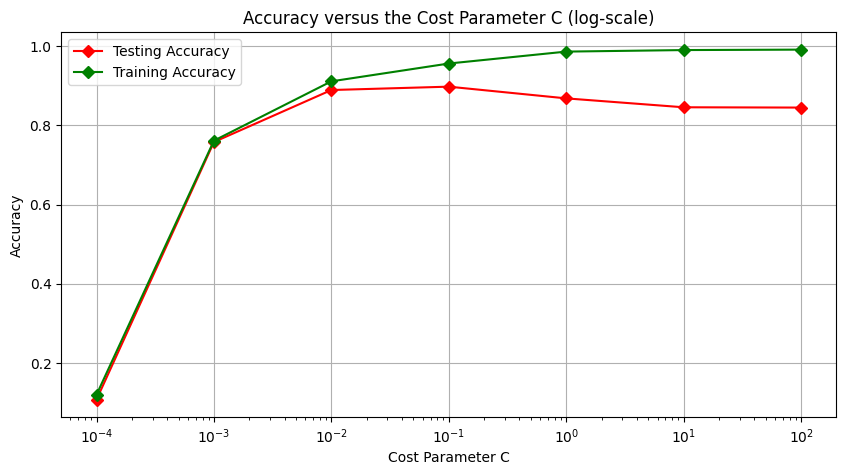

In [5]:
c = [0.0001,0.001,0.01,0.1,1,10,100]

plt.subplots(figsize=(10, 5))
plt.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
plt.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
plt.grid(True)
plt.xlabel("Cost Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus the Cost Parameter C (log-scale)')
plt.show()